<a href="https://colab.research.google.com/github/jasonhckim/DNN_Keras_MNIST/blob/main/DNN_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Section D: Load the Data

In [ ]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
import random
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
%matplotlib inline


In [ ]:
import cv2
from cv2_plt_imshow import cv2_plt_imshow

In [ ]:
# Section 1.1: Initial Data Indagation

In [ ]:
print("Train Set X shape", trainsetX.shape)
print("Train Set y shape", trainsety.shape)
print("Test Set X shape", testsetX.shape)
print("Test Set y shape", testsety.shape)

Train Set X shape (60000, 28, 28)
Train Set y shape (60000,)
Test Set X shape (10000, 28, 28)
Test Set y shape (10000,)


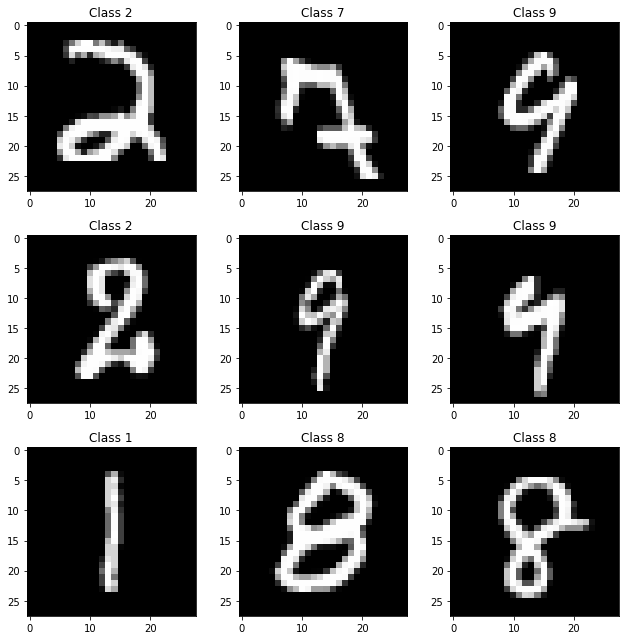

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(trainsetX))
    plt.imshow(trainsetX[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(trainsety[num]))
    
plt.tight_layout()

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(trainsetX[num])

0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0  131  216  254  254  254  229  144   11    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0  0  0    0    4  185  254  222  153  109  141  215  254  213   12    0    0    0   0  0  0  0  0  
0  0  0  0  0  0  0  0    0  142  254  205   22    0    0    0   73  254  254  145    0    0    0   0  0  0  0  0  
0  0  0  0  0  0  0  0   36  242  247   52    0    0    0    0   16  201

In [ ]:
trainsetX = trainsetX.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
testsetX = testsetX.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

trainsetX = trainsetX.astype('float32')   # change integers to 32-bit floating point numbers
testsetX = testsetX.astype('float32')

trainsetX /= 255                        # normalize each value for each pixel for the entire vector for each input
testsetX /= 255

print("Training matrix shape", trainsetX.shape)
print("Testing matrix shape", testsetX.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
nb_classes = 10 # number of unique digits

trainsetY = np_utils.to_categorical(trainsety, nb_classes)
testsetY = np_utils.to_categorical(testsety, nb_classes)

In [ ]:
#importing the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

In [ ]:
model.add(Dense(512, input_shape=(784,)))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(10))

In [ ]:
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(trainsetX, trainsetY,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2482 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.1005 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0736 - accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0559 - accuracy: 0.9817
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0445 - accuracy: 0.9858


In [ ]:
score = model.evaluate(testsetX, testsetY)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9806
Test score: 0.06794510781764984
Test accuracy: 0.9805999994277954


In [ ]:
model = Sequential()

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict(testsetX)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == testsety)[0]

incorrect_indices = np.nonzero(predicted_classes != testsety)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


<Figure size 648x648 with 0 Axes>

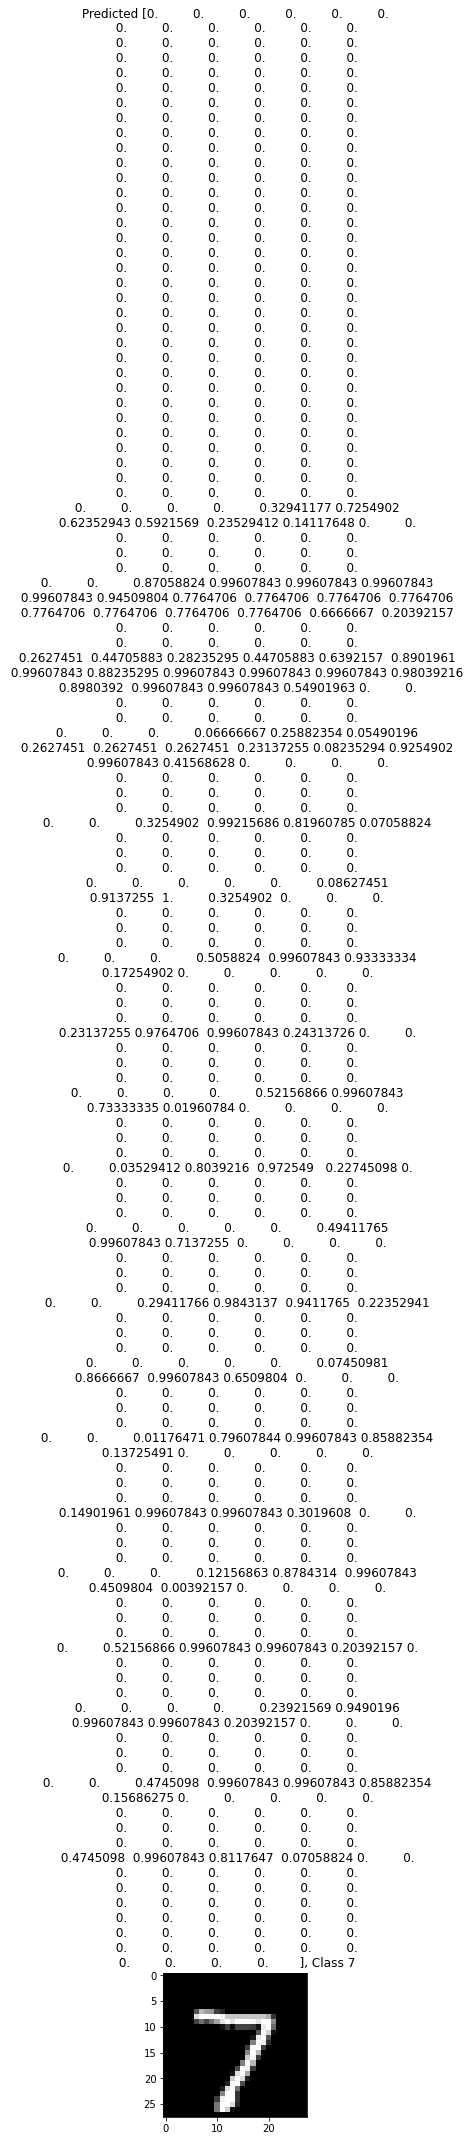

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testsetX[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], testsety[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testsetX[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], testsety[incorrect]))
    
plt.tight_layout()

In [ ]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
model = Sequential()


In [ ]:
# Reload the MNIST data
(trainsetX, trainsety), (testsetX, testsety) = mnist.load_data()

In [ ]:
trainsetX = trainsetX.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
testsetX = testsetX.reshape(10000, 28, 28, 1)

trainsetX = trainsetX.astype('float32')         # change integers to 32-bit floating point numbers
testsetX = testsetX.astype('float32')

trainsetX /= 255                              # normalize each value for each pixel for the entire vector for each input
testsetX /= 255

print("Training matrix shape", trainsetX.shape)
print("Testing matrix shape", testsetX.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
nb_classes = 10 # number of unique digits

trainsetY = np_utils.to_categorical(trainsety, nb_classes)
testsetY = np_utils.to_categorical(testsety, nb_classes)

In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [ ]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(trainsetX, trainsetY, batch_size=128)
test_generator = test_gen.flow(testsetX, testsetY, batch_size=128)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


468/468 [==============================] - 173s 367ms/step - loss: 0.1377 - accuracy: 0.9569 - val_loss: 0.1270 - val_accuracy: 0.9590
Epoch 2/5
468/468 [==============================] - 166s 354ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0277 - val_accuracy: 0.9904
Epoch 3/5
468/468 [==============================] - 170s 363ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0269 - val_accuracy: 0.9914
Epoch 4/5
468/468 [==============================] - 168s 358ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0230 - val_accuracy: 0.9922
Epoch 5/5
468/468 [==============================] - 164s 351ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0445 - val_accuracy: 0.9850


In [ ]:
score = model.evaluate(testsetX, testsetY)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 23ms/step - loss: 0.0444 - accuracy: 0.9850
Test score: 0.04444419592618942
Test accuracy: 0.9850000143051147


In [ ]:
from keras import backend as K

# choose any image to want by specifying the index
img = testsetX[3]
img = np.expand_dims(img, axis=0) # Keras requires the image to be in 4D, so we add an extra dimension to it.

# Not important to understand how this function work -- It just plots a convolution layer

def visualize(layer):
    inputs = [K.learning_phase()] + model.inputs
    
    _convout1_f = K.function(inputs, [layer.output])
    
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')

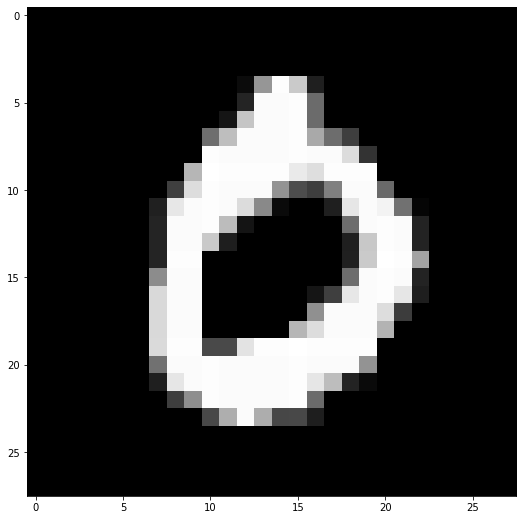

In [ ]:
plt.figure()
plt.imshow(testsetX[3].reshape(28,28), cmap='gray', interpolation='none')